In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)

# Регрессия с SVM (3 балла)

Неудивительно, что принципы SVM так же прекрасно ложатся на задачу регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных и выведите их на графике.

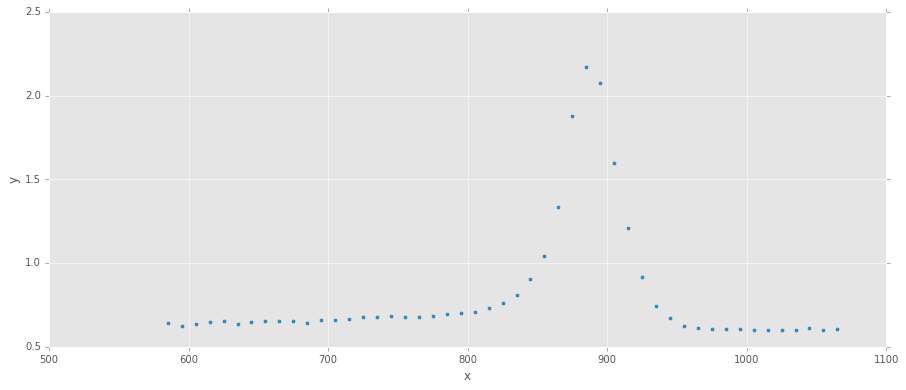

In [3]:
df = pd.read_csv('titanium.csv', index_col=None)
df.plot(x='x', y='y', kind='scatter')

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [38]:
from sklearn.metrics import mean_absolute_error

In [39]:
X = df.x.values.reshape(-1,1)
X = (X-X.mean())/X.std()
y = df.y.values

In [42]:
kernels = ['poly', 'linear', 'rbf']

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


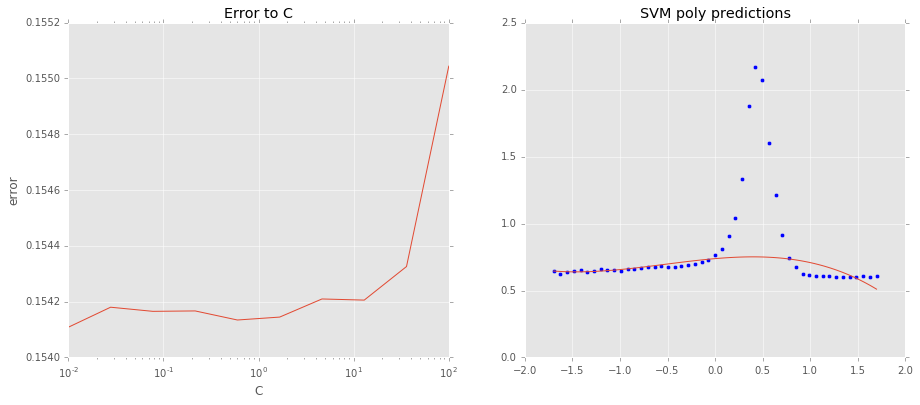

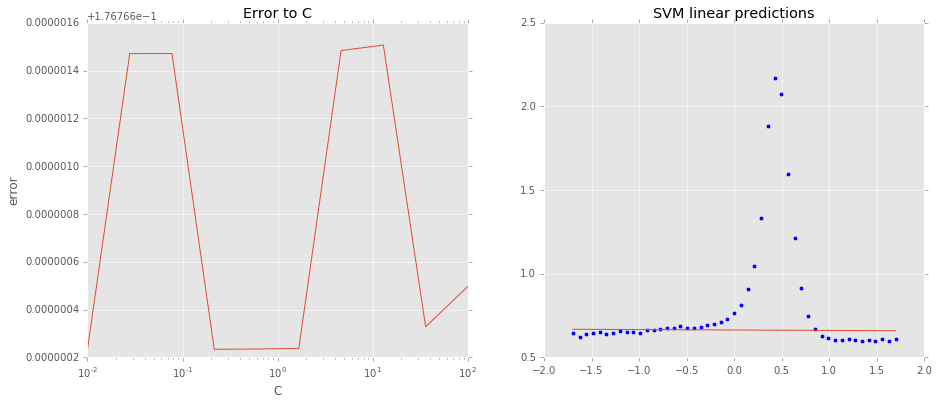

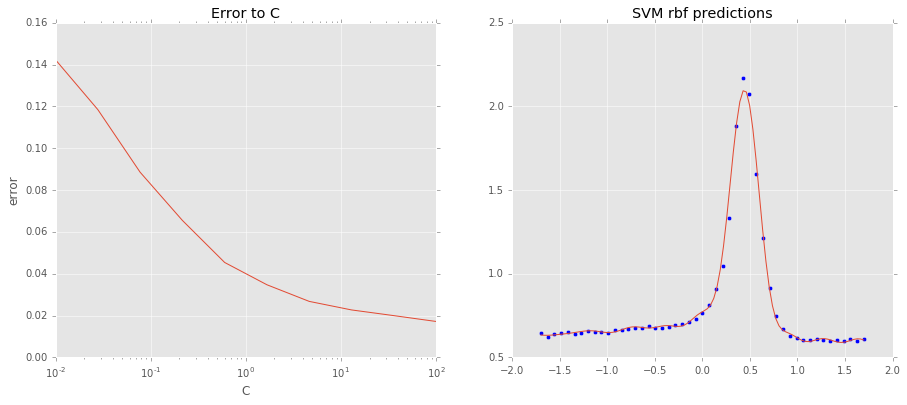

In [43]:
c_opt = np.logspace(-2, 2, 10)

# for grid
XX = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

for kernel in tqdm_notebook(kernels, 'kernels'):
    fig, ax = plt.subplots(1,2)
    errors = []
    for c in tqdm_notebook(c_opt, 'c'):
        svm = SVR(kernel=kernel, C=c, degree=3, gamma=7, epsilon=0.01, coef0=1)
        svm.fit(X, y)
        y_hat = svm.predict(X)
        errors.append(mean_absolute_error(y, y_hat))
        
    # best plotting
    idx = np.argmin(errors)
    svm = SVR(kernel=kernel, C=c_opt[idx], degree=3, gamma=7, epsilon=0.01, coef0=1)
    svm.fit(X, y)
    YY = svm.predict(XX)
        
    ax[0].plot(c_opt, errors)
    ax[0].set_xlabel('C')
    ax[0].set_ylabel('error')
    ax[0].set_xscale('log')
    ax[0].set_title('Error to C')

    ax[1].scatter(X, y)
    ax[1].plot(XX, YY)
    ax[1].set_title('SVM %s predictions' % kernel)

**ОТВЕТ:** у RBF все должно быть хорошо. Остальные ядра недообучаются

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [44]:
records = []

filepath = os.path.join('war_and_peace_es.txt')
with open(filepath, 'r') as fin:
    for line in fin:
        records.append((line.strip('\n'), 0))
    
filepath = os.path.join('war_and_peace_en.txt')
with open(filepath, 'r') as fin:
    for line in fin:
        records.append((line.strip('\n'), 1))
    
df = pd.DataFrame.from_records(records, columns=['word', 'label'])

In [45]:
# like this

df.head()

,word,label
0,guerra,0
1,pace,0
2,lev,0
3,nicoevic,0
4,tolstj,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [46]:
from sklearn.cross_validation import train_test_split

In [47]:
RND_SEED = 2134

df_cut = df.sample(n=1000, random_state=RND_SEED).reset_index(drop=True)

df_train, df_test = train_test_split(df_cut, test_size=0.4, random_state=RND_SEED)
X_train, y_train = df_train.index.values, df_train.label.values
X_train = X_train.reshape((-1,1))

X_test, y_test = df_test.index.values, df_test.label.values
X_test = X_test.reshape((-1,1))

## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [48]:
import pylev

def string_kernel(U, V):
    U = U.flatten()
    V = V.flatten()
    G = np.empty([U.shape[0], V.shape[0]])
    for i in xrange(U.shape[0]):
        for j in xrange(V.shape[0]):
            G[i, j] = np.exp(-pylev.wf_levenshtein(df_cut.loc[U[i], 'word'], df_cut.loc[V[j], 'word']))
    return G

G = string_kernel(X_train, X_train)

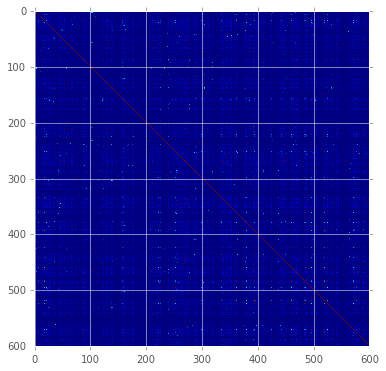

In [49]:
plt.imshow(G)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
c_opt = [0.1, 0.2, 0.5, 0.7, 1, 1.5, 2, 5, 100]
for c in tqdm_notebook(c_opt):
    svm = SVC(C=c, kernel=string_kernel)
    svm.fit(X_train, y_train)
    
    y_hat_test = svm.predict(X_test)
    test_acc = accuracy_score(y_hat_test, y_test)

    y_hat_train = svm.predict(X_train)
    train_acc = accuracy_score(y_hat_train, y_train)

    print '%.1f - %.4f - %.4f' % (c, train_acc, test_acc)
    

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


0.1 - 0.6167 - 0.6150
0.2 - 0.6817 - 0.6550
0.5 - 0.9017 - 0.7450
0.7 - 0.9933 - 0.7675
